# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print('Beginning Data Retrieval')
print('---------------------------')

rec_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i%50==0 and i>=50):
        set_count += 1
        rec_count = 0
        
    city_url = url + '&q=' + city
    
    print('Processing Record %s of Set %s | %s' % (rec_count, set_count, city))
    
    rec_count += 1
    
    # runs API request
    try:
        
        city_weather = requests.get(city_url).json() #gets all data from the url in json format
        
        # parse data into necessary info bins
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # make a list with all of the data collected
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # skip the city if there's an error
    except:
        print("City not found. Skipping...")
        pass
              
# finish data scraping process 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | nebug
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | laguna
Processing Record 12 of Set 1 | yarmouth
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | gimli
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | caravelas
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | mackay
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | komsomolskiy
Processing Record 43 of Set 4 | chapais
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | tymovskoye
Processing Record 48 of Set 4 | cooma
Processing Record 49 of Set 4 | lasa
Processing Record 0 of Set 5 | tasiilaq
Processing Record 1 of Set 5 | halalo
City not found. Skipping...
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | iquique
Processing Record 4 of Set 5 | baykit
Processing Record 5 of Set 5 | gilleleje
Processing Record 6 of Set 5 | emerald
Processing Record 7 of Set 5 | samana
Processing Record 8 of Set 5 | leningradskiy
Processing Record 9 of Set 5 | basco
Processing Record 10 of Set 5 | yerbogachen
Processing Record 11 of Set 5 | haines junction
Processing Record 12 of Set 5 | bermeo
Processin

Processing Record 30 of Set 8 | inta
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | port elizabeth
Processing Record 33 of Set 8 | severo-yeniseyskiy
Processing Record 34 of Set 8 | ugoofaaru
Processing Record 35 of Set 8 | aykhal
Processing Record 36 of Set 8 | san luis
Processing Record 37 of Set 8 | havre-saint-pierre
Processing Record 38 of Set 8 | auki
Processing Record 39 of Set 8 | benguela
Processing Record 40 of Set 8 | ochamchira
Processing Record 41 of Set 8 | lichinga
Processing Record 42 of Set 8 | suamico
Processing Record 43 of Set 8 | nioki
Processing Record 44 of Set 8 | shingu
Processing Record 45 of Set 8 | bengkulu
Processing Record 46 of Set 8 | oudtshoorn
Processing Record 47 of Set 8 | caucaia
Processing Record 48 of Set 8 | camacha
Processing Record 49 of Set 8 | ntcheu
Processing Record 0 of Set 9 | matay
Processing Record 1 of Set 9 | necochea
Processing Record 2 of Set 9 | cabinda
Processing Record 3 of Set 9 | isilkul
Processing Record

Processing Record 21 of Set 12 | tommot
Processing Record 22 of Set 12 | yotsukaido
Processing Record 23 of Set 12 | poyarkovo
Processing Record 24 of Set 12 | los llanos de aridane
Processing Record 25 of Set 12 | codo
Processing Record 26 of Set 12 | tombouctou
Processing Record 27 of Set 12 | ternate
Processing Record 28 of Set 12 | alice springs
Processing Record 29 of Set 12 | weiser
Processing Record 30 of Set 12 | socorro
Processing Record 31 of Set 12 | grand gaube
Processing Record 32 of Set 12 | mayo
Processing Record 33 of Set 12 | oktyabrskoye
Processing Record 34 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 35 of Set 12 | beroroha
Processing Record 36 of Set 12 | luxeuil-les-bains
Processing Record 37 of Set 12 | carutapera
Processing Record 38 of Set 12 | mulanje
Processing Record 39 of Set 12 | requena
Processing Record 40 of Set 12 | bandar-e torkaman
City not found. Skipping...
Processing Record 41 of Set 12 | ciudad bolivar
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
city_data_pd = pd.DataFrame(city_data)


lats = city_data_pd['Lat']
max_temps = city_data_pd['Max Temp']
humidity = city_data_pd['Humidity']
cloudiness = city_data_pd['Cloudiness']
wind_speed = city_data_pd['Wind Speed']

city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [49]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,naze,40,JP,1585854195,77,28.37,129.48,62.60,5.82
1,avarua,40,CK,1585854196,88,-21.21,-159.78,80.60,2.24
2,butaritari,59,KI,1585854196,76,3.07,172.79,82.94,8.70
3,ribeira grande,100,PT,1585854196,88,38.52,-28.70,61.41,11.68
4,dingle,7,PH,1585854196,83,11.00,122.67,78.13,8.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

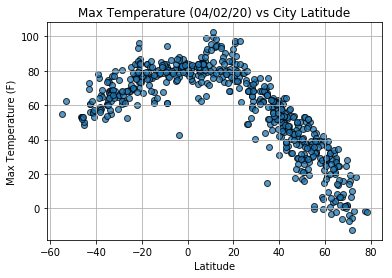

In [51]:
plt.scatter(lats, max_temps, edgecolor='black', 
            linewidths=1, marker='o', alpha = 0.75,
            label='Cities')

plt.title('Max Temperature (%s) vs City Latitude' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/TempVsLat.png')

plt.show()

#### Latitude vs. Humidity Plot

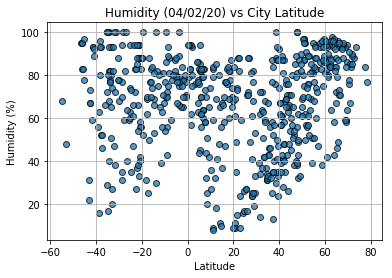

In [52]:
plt.scatter(lats, humidity, edgecolor='black', 
            linewidths=1, marker='o', alpha = 0.75,
            label='Cities')

plt.title('Humidity (%s) vs City Latitude' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/HumidityVsLat.png')

plt.show()

#### Latitude vs. Cloudiness Plot

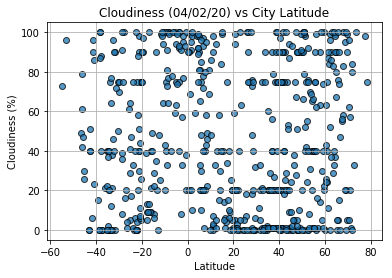

In [53]:
plt.scatter(lats, cloudiness, edgecolor='black', 
            linewidths=1, marker='o', alpha = 0.75,
            label='Cities')

plt.title('Cloudiness (%s) vs City Latitude' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/CloudinessVsLat.png')

plt.show()

#### Latitude vs. Wind Speed Plot

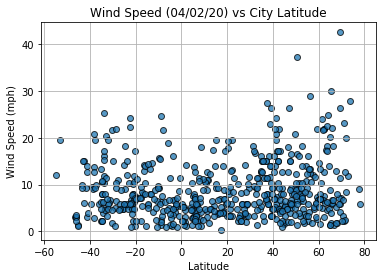

In [54]:
plt.scatter(lats, wind_speed, edgecolor='black', 
            linewidths=1, marker='o', alpha = 0.75,
            label='Cities')

plt.title('Wind Speed (%s) vs City Latitude' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/WindSpeedVsLat.png')

plt.show()

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_lin_reg(x_values, y_values, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coord, fontsize=12, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [56]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = city_data_pd.loc[(city_data_pd['Lat'] >= 0)]
south_hemi_df = city_data_pd.loc[(city_data_pd['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9080236338266959


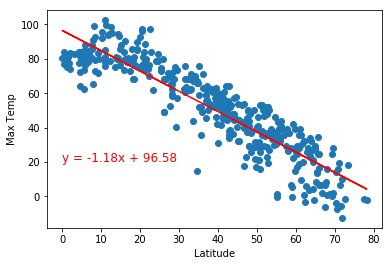

In [58]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']

plot_lin_reg(x_values, y_values, 'Max Temp', (0,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.682842774621582


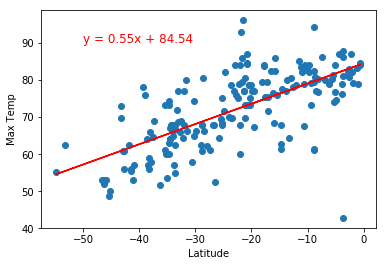

In [61]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']

plot_lin_reg(x_values, y_values, 'Max Temp', (-50,90))

#### The high r-value shows a strong relationship between temperature and latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.294152424866802


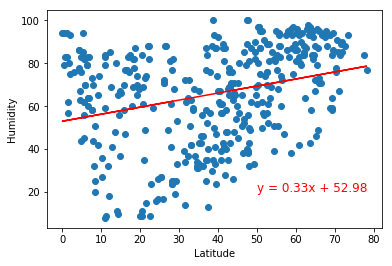

In [63]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']

plot_lin_reg(x_values, y_values, 'Humidity', (50,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0517052258423159


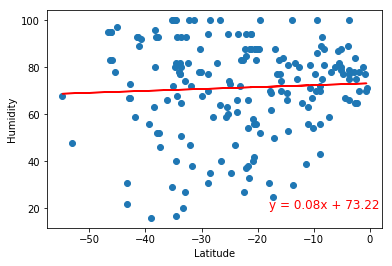

In [67]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']

plot_lin_reg(x_values, y_values, 'Humidity', (-18,20))

#### the low r-values show a poor relationship between humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0519633636885023


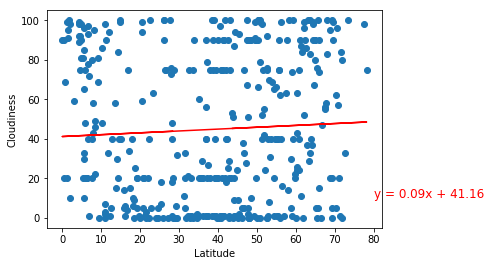

In [70]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']

plot_lin_reg(x_values, y_values, 'Cloudiness', (80,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27645701565806996


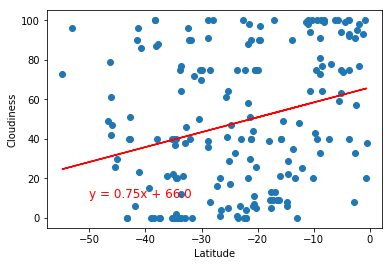

In [74]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']

plot_lin_reg(x_values, y_values, 'Cloudiness', (-50,10))

#### the low r-values show a poor relationship between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.227273474686471


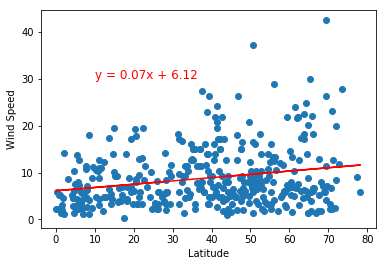

In [77]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']

plot_lin_reg(x_values, y_values, 'Wind Speed', (10,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14227742673140928


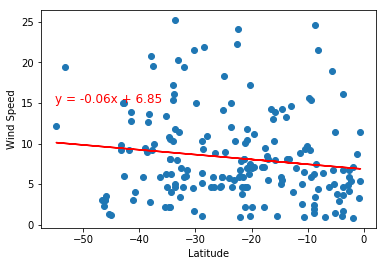

In [80]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']

plot_lin_reg(x_values, y_values, 'Wind Speed', (-55,15))

#### There is no real relationship between wind speed and the latitude based on the r-values. The only relationship that seems to be indicidant of the hemisphere playing a part is max temp vs latitude